In [1]:
import re
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from collections import Counter
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
df = pd.read_csv('Preprocessed Data.csv')

In [3]:
df.shape

(10, 13)

In [4]:
df.head(10)

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...
5,Adria Airways,1.0,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,had very bad experience with rerouted and canc...
6,Adria Airways,1.0,"Ljubljana to Zürich. Firstly, Ljubljana airp...",Economy Class,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no,ljubljana to zrich firstly ljubljana airport i...
7,Adria Airways,1.0,"First of all, I am not complaining about a s...",Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,first of all i am not complaining about a spec...
8,Adria Airways,1.0,Worst Airline ever! They combined two flight...,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no,worst airline ever they combined two flight to...
9,Adria Airways,8.0,Ljubljana to Munich. The homebase airport of ...,Economy Class,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes,ljubljana to munich the homebase airport of ad...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            10 non-null     object 
 1   Overall_Rating          10 non-null     float64
 2   Review                  10 non-null     object 
 3   Seat Type               10 non-null     object 
 4   Seat Comfort            10 non-null     float64
 5   Cabin Staff Service     10 non-null     float64
 6   Food & Beverages        9 non-null      float64
 7   Ground Service          10 non-null     float64
 8   Inflight Entertainment  4 non-null      float64
 9   Wifi & Connectivity     4 non-null      float64
 10  Value For Money         10 non-null     float64
 11  Recommended             10 non-null     object 
 12  preprocessed_review     10 non-null     object 
dtypes: float64(8), object(5)
memory usage: 1.1+ KB


**Flair**

In [17]:
from flair.data import Sentence
from flair.nn import Classifier

# Function to predict sentiment
def predict_sentiment_flair(text):
    sentence = Sentence(text)
    # load the NER tagger
    tagger = Classifier.load('sentiment')
    # run NER over sentence
    tagger.predict(sentence)
    # Confidence score (between 0 and 1)
    score = sentence.labels[0].score
    return score

# Apply the function to the dataset
df['sentiment_score'] = df['preprocessed_review'].apply(predict_sentiment_flair)

In [18]:
df.head()

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,sentiment_score
0,AB Aviation,9.0,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty decent airline online booking worked well checkin and boarding wa fine and the plane looked well maintained it a very short flight just minute or so so i didnt expect much but they still managed to hand our a bottle of water and some biscuit which i though wa very nice both flight on time,0.974683
1,AB Aviation,1.0,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline my ticket advised me to turn up at hr which i did there wa confusion at this small airport i wa then directed to the office of ab aviation which wa still closed it opened at hr and i wa told that the flight had been put back to hr and that they had tried to contact me this could not be true a they did not have my phone number i wa with a local guide and he had not been informed either i presume that i wa bumped off the later flight did operate but a usual there wa confusion at checkin the flight wa only min and there were no further problem not a good airline but it is the only one for comoros,0.999763
2,AB Aviation,1.0,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and the only airline based in comoros checkin wa disorganised because of local with big package and disinterested staff the flight wa fortunately short min took off on time and landed on time with a short flight like there wa of course no inflight entertainment nor cabin service except for biscuit and a bottle of water which wa quite nice,0.982233
3,Adria Airways,1.0,"Please do a favor yourself and do not fly with Adria. On the route from Munich to Pristina in July 2019 they lost my luggage and for 10 days in a row, despite numerous phone calls they were not able to locate it. 11 days later the luggage arrived at the destination completely ruined. Applying for compensation, they ignored my request. Foolishly again, I booked another flight with them (345 euros) Frankfurt - Pristina in September 2019. They cancelled the flight with no reason 24 hours before the departure. Desperate phone calls to customer service to get anything (rerouting, compensation, etc) were not responded. I will never fly again with Adria. What a disgrace! Shame on you Adria for constantly deceiving your customers."

In [19]:
pd.set_option('display.max_colwidth', None)
df[['Review', 'sentiment_score']].head()

,Review,sentiment_score
0,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",0.974683
1,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",0.999763
2,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",0.982233
3,"Please do a favor yourself and do not fly with Adria. On the route from Munich to Pristina in July 2019 they lost my luggage and for 10 days in a row, despite numerous phone calls they were not able to locate it. 11 days later the luggage arrived at the destination completely ruined. Applying for compensation, they ignored my request. Foolishly again, I booked another flight with them (345 euros) Frankfurt - Pristina in September 2019. They cancelled the flight with no reason 24 hours before the departure. Desperate phone calls to customer service to get anything (rerouting, compensation, etc) were not responded. I will never fly again with Adria. What a disgrace! Shame on you Adria for constantly deceiving your customers.",0.999965
4,"Do not book a flight with this airline! My friend and I should have returned from Sofia to Amsterdam on September 22 and 3 days before, they sent us an SMS informing the flight was cancelled. For 3 straight days we tried to reach the airline and the web agent (e-dreams) and we did not get a solution. Finally, 18 hours before our cancelled flight time, and after 35 minutes on a call (waiting), the airline was able to get us on a flight with Lufthansa. Do not book Adria Airways, it is unreliable and in our case, it ruined our last days of holidays since we needed to be on the phones all day.",0.999956


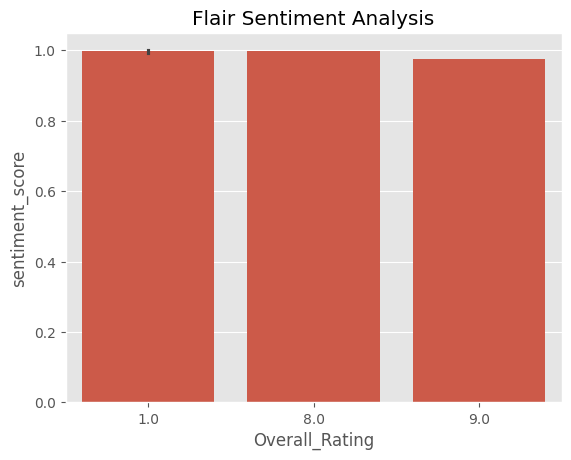

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ax = sns.barplot(data=df, x='Overall_Rating', y='sentiment_score')
ax.set_title('Flair Sentiment Analysis')
plt.show()

**Data Analysis**

In [21]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"Before: Number of unique values in Airline Name: {unique_values_count}")

Before: Number of unique values in Airline Name: 2


In [13]:
# Count the occurrences of each Airline Name
airline_counts = df.groupby("Airline Name")["Airline Name"].transform("count")

# Filter the DataFrame to keep rows where the count is 50 or more
df = df[airline_counts >= 50]

In [22]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"After: Number of unique values in Airline Name: {unique_values_count}")

After: Number of unique values in Airline Name: 2


In [23]:
df.shape

(10, 14)

In [24]:
# Group by "Airline Name" and compute the mean for "sentiment_score"
result = (
    df.groupby("Airline Name")["sentiment_score"]
    .mean()
    .reset_index()
    .sort_values(by="sentiment_score", ascending=False)
)
print(result)

    Airline Name  sentiment_score
1  Adria Airways         0.999611
0    AB Aviation         0.985560


In [25]:
# Extract top 5 airlines with the highest sentiment_score
top_5_airlines = result.nlargest(5, "sentiment_score")
print(top_5_airlines)

    Airline Name  sentiment_score
1  Adria Airways         0.999611
0    AB Aviation         0.985560


In [26]:
# Extract top 5 airlines with the lowest sentiment_score
last_5_airlines = result.nsmallest(5, "sentiment_score")
print(last_5_airlines)

    Airline Name  sentiment_score
0    AB Aviation         0.985560
1  Adria Airways         0.999611


In [27]:
# Calculate the correlation matrix
columns_of_interest = ["sentiment_score", "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"]
correlation_matrix = df[columns_of_interest].corr()

# Extract the correlation of each column with sentiment_score
correlation_with_sentiment = correlation_matrix["sentiment_score"].sort_values(ascending=False)
print(correlation_with_sentiment)

sentiment_score           1.000000
Value For Money          -0.381686
Ground Service           -0.433293
Cabin Staff Service      -0.564303
Seat Comfort             -0.635912
Food & Beverages         -0.639516
Inflight Entertainment         NaN
Wifi & Connectivity            NaN
Name: sentiment_score, dtype: float64


**Common Theme**

In [28]:
negative_reviews = df[df["sentiment_score"] < 0.5]["Review"]
positive_reviews = df[df["sentiment_score"] > 0.5]["Review"]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(reviews, num_top_words=500):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english", ngram_range=(2, 2))

    # Vectorize the reviews
    dtm = vectorizer.fit_transform(reviews)

    # Get the word frequencies
    word_frequencies = dtm.sum(axis=0).A1  # Sum across all rows (documents)

    # Map words to their frequencies
    words = vectorizer.get_feature_names_out()
    word_freq_dict = dict(zip(words, word_frequencies))

    # Sort the dictionary by frequency in descending order
    top_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:num_top_words]

    return top_words

In [30]:
# Get top words for positive and negative reviews
top_positive_words = get_top_words(positive_reviews, num_top_words=500)
top_negative_words = get_top_words(negative_reviews, num_top_words=500)

# Print top 20 words
print("Top words in positive reviews:")
for word, freq in top_positive_words[:20]:
    print(f"{word}: {freq}")

print("\nTop words in negative reviews:")
for word, freq in top_negative_words[:20]:
    print(f"{word}: {freq}")

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(reviews, title="Word Cloud", num_top_words=500):
    # Get the top words
    top_words = get_top_words(reviews, num_top_words)

    # Create a dictionary for WordCloud
    word_freq_dict = dict(top_words)

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Generate WordCloud for positive and negative reviews
generate_wordcloud(positive_reviews, title="Word Cloud for Positive Reviews", num_top_words=100)
generate_wordcloud(negative_reviews, title="Word Cloud for Negative Reviews", num_top_words=100)